In [1]:
import os
import json
import cv2
import random
import time

# YOLO2COCO

In [2]:
def yolotxt2cocojson(save_dir, class_txt_path, label_dir, img_dir):
    with open(class_txt_path,'r') as fr: #Open and read category files
        lines1 = fr. readlines()
    # print(lines1)
    categories=[] #list of storage categories
    for j,label in enumerate(lines1):
        label = label. strip()
        categories.append({'id':j+1,'name':label,'supercategory':'None'}) #Add category information to categories
    # print(categories)

    write_json_context=dict() #Write a large dictionary of .json files
    write_json_context['info']= {'description': '', 'url': '', 'version': '', 'year': 2023 , 'contributor': 'pure ss', 'date_created': '2023-10-9'}
    write_json_context['licenses']=[{'id':1,'name':None,'url':None}]
    write_json_context['categories']=categories
    write_json_context['images']=[]
    write_json_context['annotations']=[]

    #The following code mainly adds the key values of 'images' and 'annotations'
    img_list=os.listdir(img_dir) #traverse all files in this folder, and add all file names to the list
    for i,img_name in enumerate(img_list):
      if img_name.find(".png"):
        img_path = os.path.join(img_dir,img_name) #Get the absolute path of the image
        image = cv2.imread(img_path) #Read the picture, then get the width and height of the picture
        H, W = image.shape[:2]
        # print(img_name)
        # print(type(img_name))

        img_context={} #Use a dictionary to store the image information
        #img_name=os.path.basename(img_path) #Return the last file name of path. If path ends with / or \, an empty value will be returned
        img_context['file_name']=img_name
        # print(img_context['file_name'])
        img_context['height']=H
        img_context['width']=W
        img_context['date_captured']='2023-10-9'
        img_context['id']=i #The id of the picture
        img_context['license']=1
        img_context['color_url']=''
        img_context['flickr_url']=''
        write_json_context['images'].append(img_context) #Add the image information to the 'image' list
        # print(img_name)

        label_name = img_name.split('.')[0] + '.txt' #Get the txt file corresponding to the picture
        with open(os.path.join(label_dir,label_name),'r') as fr:
            lines=fr.readlines() #Read each line of data in the txt file, lines2 is a list that contains all the annotation information of a picture
        for j,line in enumerate(lines):

            bbox_dict = {} #store each bounding box information in the dictionary
            # line = line.strip().split()
            # print(line. strip(). split(' '))

            class_id,x,y,w,h=line.strip().split(' ') #Get the detailed information of each label box
            class_id,x, y, w, h = int(class_id), float(x), float(y), float(w), float(h) #Convert string type to computable int and float type

            xmin=(x-w/2)*W #coordinate conversion
            ymin=(y-h/2)*H
            xmax=(x + w/2)*W
            ymax=(y + h/2)*H
            w=w*W
            h=h*H

            bbox_dict['id']=i*10000 + j #bounding box coordinate information
            bbox_dict['image_id']=i
            bbox_dict['category_id']=class_id + 1 #Note that the target category should be added by one
            bbox_dict['iscrowd']=0
            height,width=abs(ymax-ymin),abs(xmax-xmin)
            bbox_dict['area']=height*width
            bbox_dict['bbox']=[xmin,ymin,w,h]
            bbox_dict['segmentation']=[[xmin,ymin,xmax,ymin,xmax,ymax,xmin,ymax]]
            write_json_context['annotations'].append(bbox_dict) #Add each bounding box information stored by the dictionary to the 'annotations' list
    name = os.path.join(save_dir+'/images','_annotations.coco.json')
    with open(name,'w') as fw: #Write the dictionary information into the .json file
        json.dump(write_json_context,fw,indent=2,ensure_ascii=False) #Add suffix ensure_ascii=False to place Chinese garbled characters after writing

def the_number_of_file_in_dir(img_dir, label_dir):
    #Check the number of files in the two folders
    label_list = os.listdir(label_dir)
    img_list = os. listdir(img_dir)
    print(len(label_list))
    print(len(img_list))

def create_coco_file(save_dir, class_txt_path, label_dir, img_dir):
    #Generate training set file
    save_dir = os.path.join(save_dir)
    label_dir = os.path.join(label_dir)
    img_dir = os.path.join(img_dir)
    # the_number_of_file_in_dir(img_dir,label_dir)
    yolotxt2cocojson(save_dir, class_txt_path, label_dir, img_dir)

In [3]:
!unzip /content/drive/MyDrive/dataset_yolo.zip -d /content/

Archive:  /content/drive/MyDrive/dataset_yolo.zip
   creating: /content/content/dataset/
   creating: /content/content/dataset/test/
   creating: /content/content/dataset/test/images/
  inflating: /content/content/dataset/test/images/sample_2105.png  
  inflating: /content/content/dataset/test/images/sample_2117.png  
  inflating: /content/content/dataset/test/images/sample_2114.png  
  inflating: /content/content/dataset/test/images/sample_2111.png  
  inflating: /content/content/dataset/test/images/sample_2109.png  
  inflating: /content/content/dataset/test/images/sample_2101.png  
  inflating: /content/content/dataset/test/images/sample_2102.png  
  inflating: /content/content/dataset/test/images/sample_2100.png  
  inflating: /content/content/dataset/test/images/sample_2119.png  
  inflating: /content/content/dataset/test/images/sample_2106.png  
  inflating: /content/content/dataset/test/images/sample_2113.png  
  inflating: /content/content/dataset/test/images/sample_2115.png  


In [4]:
from shutil import move
move("/content/content/dataset", "/content/dataset")

'/content/dataset'

In [5]:
save_dir='/content/dataset/' #Target folder, used to save the generated coco format file
class_txt_path='/content/names.txt' #category file, one class per line, create by yourself
dataset_dirs = ['train', 'val', 'test']
for dir in dataset_dirs:
  label_dir=f'/content/dataset/{dir}/labels' #The folder where the yolo format label is located
  img_dir=f'/content/dataset/{dir}/images' #The folder where the picture is located
  create_coco_file(save_dir+dir, class_txt_path, label_dir, img_dir)

# Load dataset

In [6]:
!pip install -U torchvision # We need a new versino of torchvision for this project

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 99.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
import torch
import torchvision
from torchvision import datasets, models
from torchvision.transforms import functional as FT
from torchvision import transforms as T
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import DataLoader, sampler, random_split, Dataset
import copy
import math
import albumentations as A  # our data augmentation library

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# remove arnings (optional)
import warnings
warnings.filterwarnings("ignore")
from collections import defaultdict, deque
import datetime
import time
from tqdm import tqdm # progress bar
from torchvision.utils import draw_bounding_boxes

In [9]:
print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


In [10]:
# our dataset is in cocoformat, we will need pypcoco tools
!pip install pycocotools
from pycocotools.coco import COCO

In [11]:
# Now, we will define our transforms
from albumentations.pytorch import ToTensorV2

In [12]:
def get_transforms(train=False):
    if train:
        transform = A.Compose([
            A.Resize(600, 600), # our input size can be 600px
            A.HorizontalFlip(p=0.3),
            A.VerticalFlip(p=0.3),
            A.RandomBrightnessContrast(p=0.1),
            A.ColorJitter(p=0.1),
            ToTensorV2()
        ], bbox_params=A.BboxParams(format='coco'))
    else:
        transform = A.Compose([
            A.Resize(600, 600), # our input size can be 600px
            ToTensorV2()
        ], bbox_params=A.BboxParams(format='coco'))
    return transform

In [42]:
class LogoDetection(datasets.VisionDataset):
    def __init__(self, root, split='train/images', transform=None, target_transform=None, transforms=None):
        # the 3 transform parameters are reuqired for datasets.VisionDataset
        super().__init__(root, transforms, transform, target_transform)
        self.split = split #train, valid, test
        self.coco = COCO(os.path.join(root, split, "_annotations.coco.json")) # annotatiosn stored here
        self.ids = list(sorted(self.coco.imgs.keys()))
        self.ids = [id for id in self.ids if (len(self._load_target(id)) > 0)]

    def _load_image(self, id: int):
        path = self.coco.loadImgs(id)[0]['file_name']
        image = cv2.imread(os.path.join(self.root, self.split, path))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return image
    def _load_target(self, id):
        return self.coco.loadAnns(self.coco.getAnnIds(id))

    def __getitem__(self, index):
        id = self.ids[index]
        image = self._load_image(id)
        target = self._load_target(id)
        target = copy.deepcopy(self._load_target(id))

        boxes = [t['bbox'] + [t['category_id']] for t in target] # required annotation format for albumentations
        if self.transforms is not None:
            transformed = self.transforms(image=image, bboxes=boxes)

        image = transformed['image']
        boxes = transformed['bboxes']

        new_boxes = [] # convert from xywh to xyxy
        for box in boxes:
            xmin = box[0]
            xmax = xmin + box[2]
            ymin = box[1]
            ymax = ymin + box[3]
            new_boxes.append([xmin, ymin, xmax, ymax])

        boxes = torch.tensor(new_boxes, dtype=torch.float32)

        targ = {} # here is our transformed target
        targ['boxes'] = boxes
        targ['labels'] = torch.tensor([t['category_id'] for t in target], dtype=torch.int64)
        targ['image_id'] = torch.tensor([t['image_id'] for t in target])
        targ['area'] = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0]) # we have a different area
        targ['iscrowd'] = torch.tensor([t['iscrowd'] for t in target], dtype=torch.int64)
        return image.div(255), targ # scale images
    def __len__(self):
        return len(self.ids)

In [14]:
dataset_path = "/content/dataset/"

In [15]:
#load classes
coco = COCO(os.path.join(dataset_path, "train/images", "_annotations.coco.json"))
categories = coco.cats
n_classes = len(categories.keys())
categories

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


{1: {'id': 1, 'name': 'tinkoff', 'supercategory': 'None'},
 2: {'id': 2, 'name': 'naumen', 'supercategory': 'None'},
 3: {'id': 3, 'name': 'ussc', 'supercategory': 'None'},
 4: {'id': 4, 'name': 'rostelecom', 'supercategory': 'None'},
 5: {'id': 5, 'name': 'sber', 'supercategory': 'None'},
 6: {'id': 6, 'name': 'gosuslugi', 'supercategory': 'None'}}

In [16]:
classes = [i[1]['name'] for i in categories.items()]
classes

['tinkoff', 'naumen', 'ussc', 'rostelecom', 'sber', 'gosuslugi']

In [43]:
train_dataset = LogoDetection(root=dataset_path, transforms=get_transforms(True))

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


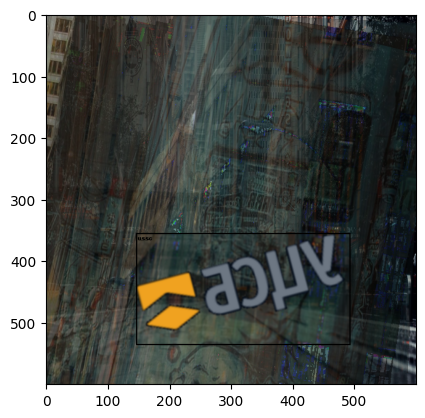

In [50]:
# Lets view a sample
sample = train_dataset[666]
img_int = torch.tensor(sample[0] * 255, dtype=torch.uint8)
plt.imshow(draw_bounding_boxes(
    img_int, sample[1]['boxes'], [classes[i-1] for i in sample[1]['labels']], width=2
).permute(1, 2, 0))

In [51]:
sample[1]['labels']

tensor([3])

In [52]:
len(train_dataset)

1500

# Train model

In [53]:
# lets load the faster rcnn model
model = models.detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)
in_features = model.roi_heads.box_predictor.cls_score.in_features # we need to change the head
model.roi_heads.box_predictor = models.detection.faster_rcnn.FastRCNNPredictor(in_features, 7)

Downloading: "https://download.pytorch.org/models/fasterrcnn_mobilenet_v3_large_fpn-fb6a3cc7.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_mobilenet_v3_large_fpn-fb6a3cc7.pth
100%|██████████| 74.2M/74.2M [00:00<00:00, 135MB/s]


In [54]:
def collate_fn(batch):
    return tuple(zip(*batch))

In [55]:
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4, collate_fn=collate_fn)

In [56]:
images,targets = next(iter(train_loader))
images = list(image for image in images)
targets = [{k:v for k, v in t.items()} for t in targets]
output = model(images, targets) # just make sure this runs without error

In [57]:
device = torch.device("cuda")

In [58]:
model = model.to(device)

In [59]:
import sys
import pandas as pd
import numpy as np

In [60]:
# Now, and optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.01, momentum=0.9, nesterov=True, weight_decay=1e-4)
# lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[16, 22], gamma=0.1) # lr scheduler

In [61]:
def train_one_epoch(model, optimizer, loader, device, epoch):
    model.to(device)
    model.train()

#     lr_scheduler = None
#     if epoch == 0:
#         warmup_factor = 1.0 / 1000 # do lr warmup
#         warmup_iters = min(1000, len(loader) - 1)

#         lr_scheduler = optim.lr_scheduler.LinearLR(optimizer, start_factor = warmup_factor, total_iters=warmup_iters)

    all_losses = []
    all_losses_dict = []

    for images, targets in tqdm(loader):
        images = list(image.to(device) for image in images)
        targets = [{k: torch.tensor(v).to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets) # the model computes the loss automatically if we pass in targets
        losses = sum(loss for loss in loss_dict.values())
        loss_dict_append = {k: v.item() for k, v in loss_dict.items()}
        loss_value = losses.item()

        all_losses.append(loss_value)
        all_losses_dict.append(loss_dict_append)

        if not math.isfinite(loss_value):
            print(f"Loss is {loss_value}, stopping trainig") # train if loss becomes infinity
            print(loss_dict)
            sys.exit(1)

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

#         if lr_scheduler is not None:
#             lr_scheduler.step() #

    all_losses_dict = pd.DataFrame(all_losses_dict) # for printing
    print("Epoch {}, lr: {:.6f}, loss: {:.6f}, loss_classifier: {:.6f}, loss_box: {:.6f}, loss_rpn_box: {:.6f}, loss_object: {:.6f}".format(
        epoch, optimizer.param_groups[0]['lr'], np.mean(all_losses),
        all_losses_dict['loss_classifier'].mean(),
        all_losses_dict['loss_box_reg'].mean(),
        all_losses_dict['loss_rpn_box_reg'].mean(),
        all_losses_dict['loss_objectness'].mean()
    ))

In [62]:
!nvidia-smi

Mon Oct  9 10:49:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    27W /  70W |    187MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [63]:
num_epochs=10

for epoch in range(num_epochs):
    train_one_epoch(model, optimizer, train_loader, device, epoch)
#     lr_scheduler.step()

100%|██████████| 375/375 [00:59<00:00,  6.26it/s]


Epoch 0, lr: 0.010000, loss: 0.789760, loss_classifier: 0.320746, loss_box: 0.457685, loss_rpn_box: 0.005197, loss_object: 0.006131


100%|██████████| 375/375 [00:55<00:00,  6.78it/s]


Epoch 1, lr: 0.010000, loss: 0.490749, loss_classifier: 0.159279, loss_box: 0.326214, loss_rpn_box: 0.002267, loss_object: 0.002989


100%|██████████| 375/375 [00:55<00:00,  6.81it/s]


Epoch 2, lr: 0.010000, loss: 0.405719, loss_classifier: 0.135974, loss_box: 0.265386, loss_rpn_box: 0.001811, loss_object: 0.002548


100%|██████████| 375/375 [00:55<00:00,  6.79it/s]


Epoch 3, lr: 0.010000, loss: 0.367127, loss_classifier: 0.124824, loss_box: 0.238118, loss_rpn_box: 0.001619, loss_object: 0.002566


100%|██████████| 375/375 [00:57<00:00,  6.55it/s]


Epoch 4, lr: 0.010000, loss: 0.349668, loss_classifier: 0.112061, loss_box: 0.233964, loss_rpn_box: 0.001468, loss_object: 0.002175


100%|██████████| 375/375 [00:55<00:00,  6.73it/s]


Epoch 5, lr: 0.010000, loss: 0.338769, loss_classifier: 0.112342, loss_box: 0.223012, loss_rpn_box: 0.001433, loss_object: 0.001981


100%|██████████| 375/375 [00:55<00:00,  6.79it/s]


Epoch 6, lr: 0.010000, loss: 0.312501, loss_classifier: 0.110271, loss_box: 0.198866, loss_rpn_box: 0.001296, loss_object: 0.002068


100%|██████████| 375/375 [00:55<00:00,  6.79it/s]


Epoch 7, lr: 0.010000, loss: 0.312907, loss_classifier: 0.106883, loss_box: 0.203023, loss_rpn_box: 0.001195, loss_object: 0.001806


100%|██████████| 375/375 [00:56<00:00,  6.64it/s]


Epoch 8, lr: 0.010000, loss: 0.310281, loss_classifier: 0.112566, loss_box: 0.194571, loss_rpn_box: 0.001239, loss_object: 0.001904


100%|██████████| 375/375 [00:56<00:00,  6.67it/s]

Epoch 9, lr: 0.010000, loss: 0.288364, loss_classifier: 0.094557, loss_box: 0.191006, loss_rpn_box: 0.001172, loss_object: 0.001629


# Predict on sample Images

In [64]:
# we will watch first epoich to ensure no errrors
# while it is training, lets write code to see the models predictions. lets try again
model.eval()
torch.cuda.empty_cache()

In [65]:
test_dataset = LogoDetection(root=dataset_path, split="test/images", transforms=get_transforms(False))

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [70]:
img, _ = test_dataset[19]
img_int = torch.tensor(img*255, dtype=torch.uint8)
with torch.no_grad():
    prediction = model([img.to(device)])
    pred = prediction[0]

tensor(1, device='cuda:0') tensor(0.9948, device='cuda:0')


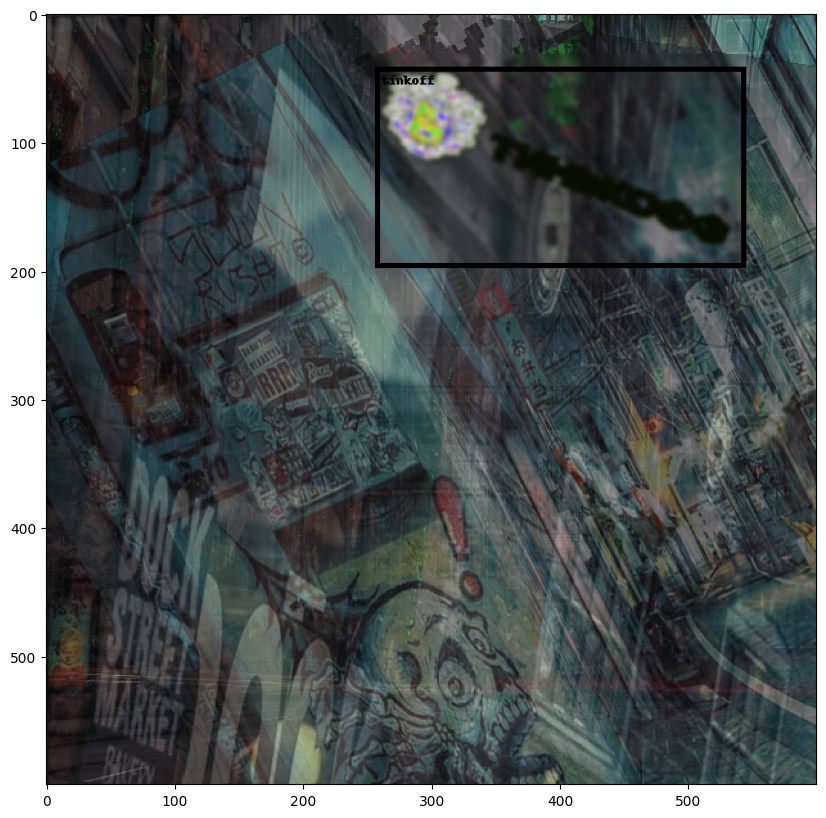

In [94]:
fig = plt.figure(figsize=(14, 10))
plt.imshow(draw_bounding_boxes(img_int,
    pred['boxes'][pred['scores'] > 0.8],
    [classes[i-1] for i in pred['labels'][pred['scores'] > 0.8].tolist()], width=4
).permute(1, 2, 0))
print(pred['labels'][0], pred['scores'][0])

#plt.savefig('predict_fastrcnn.png')

In [147]:
def single_image_prediction(image_path: str, save_path: str, threshold: float) -> None:
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  transform = T.Compose([
      T.ToTensor()
  ])
  tensor = transform(image)

  img_int = torch.tensor(tensor*255, dtype=torch.uint8)
  with torch.no_grad():
      prediction = model2([tensor.to(device)])
      pred = prediction[0]

  fig = plt.figure(figsize=(14, 10))
  plt.axis('off')
  plt.imshow(draw_bounding_boxes(img_int,
      pred['boxes'][pred['scores'] > threshold],
      [classes[i-1] for i in pred['labels'][pred['scores'] > threshold].tolist()], width=4
  ).permute(1, 2, 0))
  plt.savefig(save_path, bbox_inches='tight', pad_inches = 0)

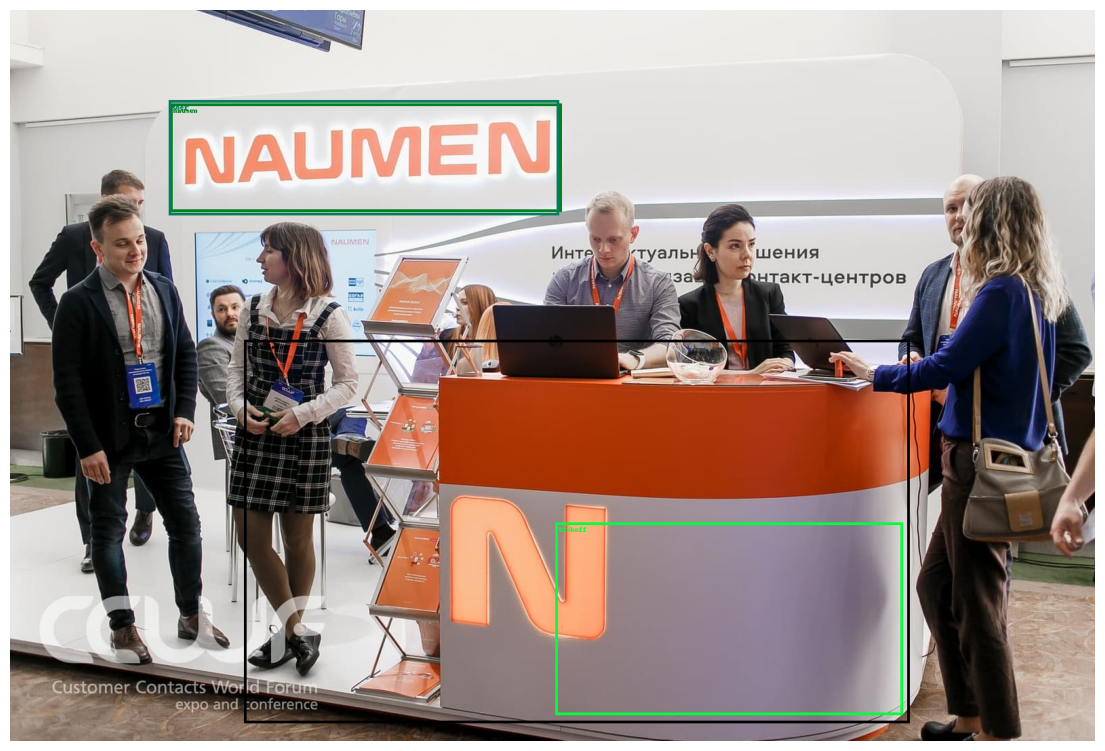

In [129]:
single_image_prediction('/content/test1.jpeg','naumen_predict.png', 0)

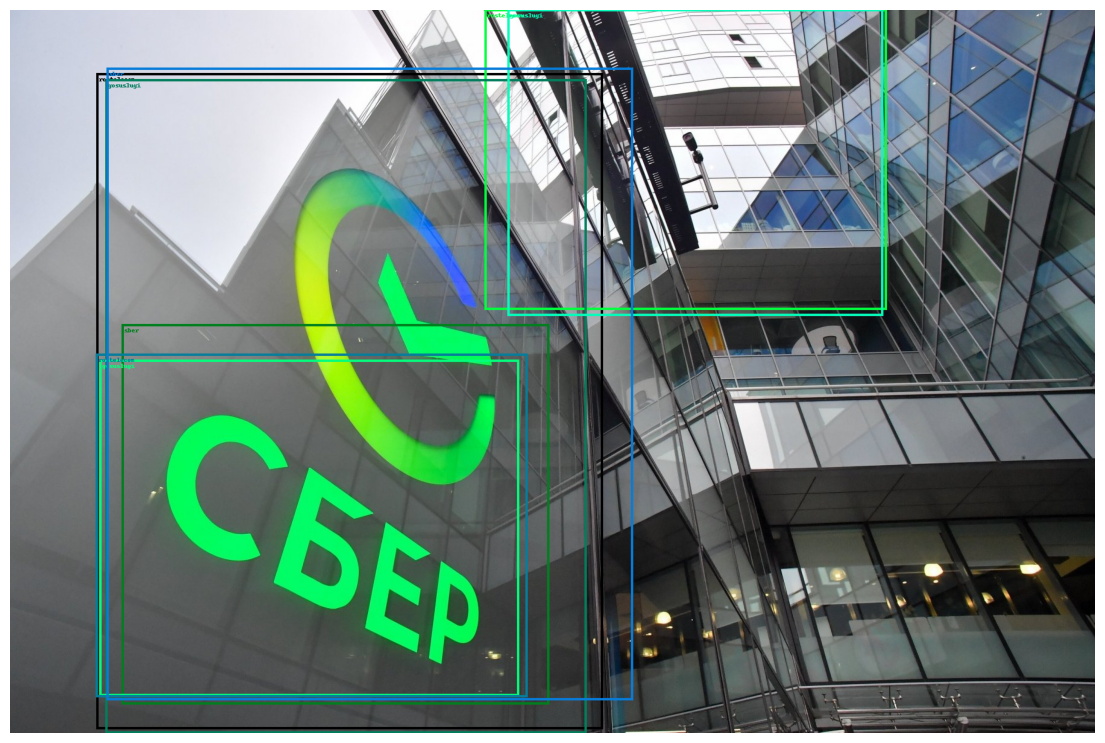

In [136]:
single_image_prediction('/content/news_99763.jpg','sberoffice_predict.png', 0)

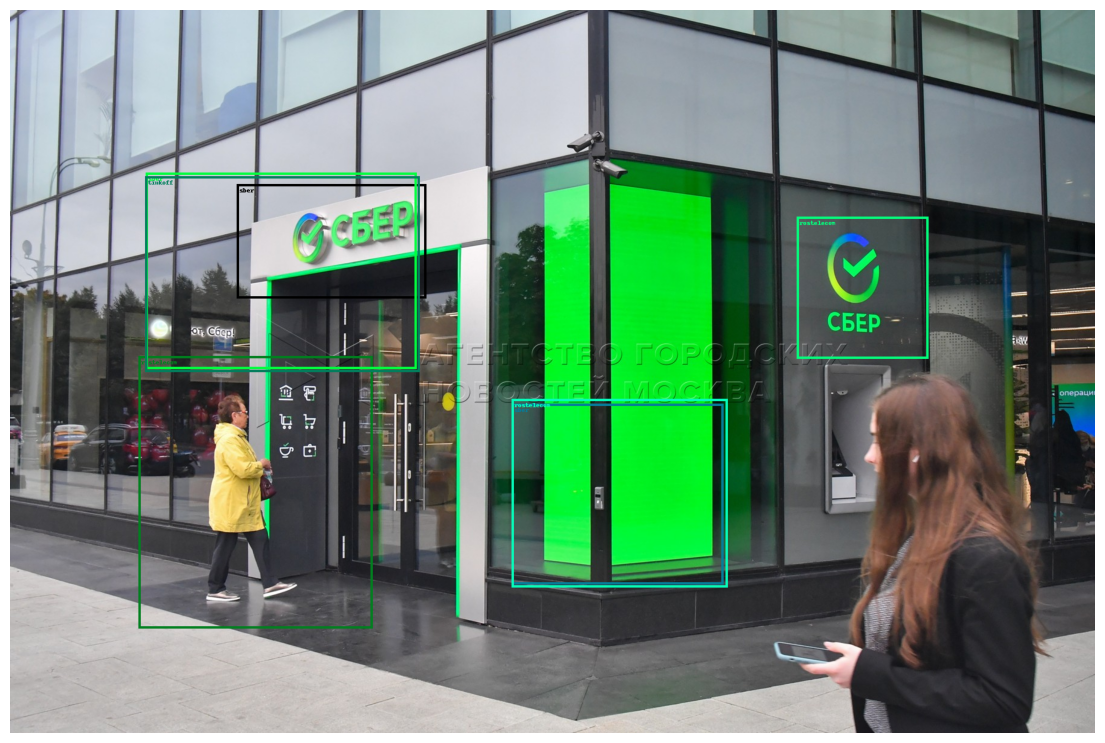

In [137]:
single_image_prediction('/content/567110.jpg', 'sberoffice2_predict.png', 0)

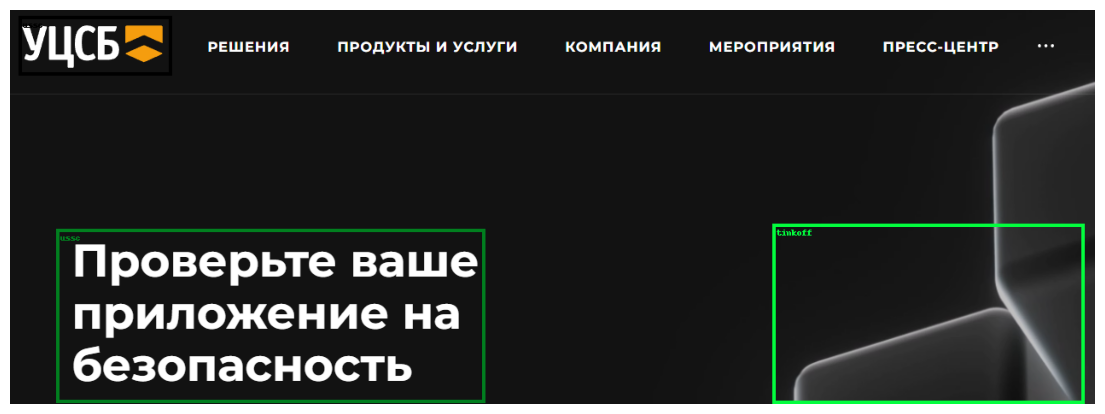

In [143]:
single_image_prediction('/content/ussc.png', 'ussc_predict.png', 0.8)

# Save & Load model

In [144]:
#save weights of model
torch.save(model.state_dict(), 'model_weights.pth')

In [ ]:
#load weights to model
model2 = models.detection.fasterrcnn_mobilenet_v3_large_fpn() # we do not specify ``weights``, i.e. create untrained model
in_features = model2.roi_heads.box_predictor.cls_score.in_features # we need to change the head
model2.roi_heads.box_predictor = models.detection.faster_rcnn.FastRCNNPredictor(in_features, 7)
model2.load_state_dict(torch.load('/content/model_weights.pth'))
model2.to(device)
model2.eval()